<a href="https://colab.research.google.com/github/OlekanmaVictoria/Data-science-Portfolio/blob/main/Googleplaystore9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM IDENTIFICATION
This is a Dataset from platstore containing all Appliccations downloaded from the year 2017 to 2018.The dataset involves many featured observations such as: Type of APP downloaded,Category,Rating,reviews,size,installments,price,content ratings,Genres,Last Updated,current ver1 and current ver 2 .
It is a combination of both a categorical and numerical dataset
My aim of analysis and model devlopment is to
1.) Find App trends

2.)user behavior

3.)market dynamics

4.)Popular App Categories:
Identify which app categories are most popular among users. This can help developers understand market demand and guide them in creating apps that cater to the interests of a broader audience.

5.)Top-Rated Apps:
Determine the apps with the highest ratings and user satisfaction. This information can be used by users to discover quality apps and by developers to understand what aspects users appreciate the most.

6.)User Reviews and Sentiments:
Analyze user reviews to understand the sentiments and opinions of users towards different apps. Positive and negative feedback can provide insights into app strengths and weaknesses.

7.)App Installs and Downloads:
Study the number of installs or downloads for different apps to gauge their popularity and market reach. This can help identify which apps are gaining traction among users.

8.)Price vs. Popularity:
Investigate the relationship between app price and the number of installs or ratings. This can help developers understand the impact of app pricing on user acquisition and profitability.

9.)Geographical Trends:
Analyze app usage and preferences across different regions and countries. This information can help developers tailor their apps to specific markets.

10.)App Size and User Preferences:
Investigate the relationship between app size and user preferences. Users may prefer smaller apps that consume less storage space, leading to more installations.

11.)In-App Purchases and Revenue Generation:
Identify apps that generate revenue through in-app purchases and analyze the trends in their sales. This can provide insights into effective monetization strategies.

12.) Seasonal Trends:
Observe whether certain app categories or specific apps experience increased interest during certain seasons or events. This can help developers plan their marketing campaigns more effectively.

13.) App Performance and User Satisfaction:
Analyze app performance metrics (e.g., crash rate, loading time) and correlate them with user satisfaction. Apps with better performance may receive higher ratings and more positive reviews.

14).Competitor Analysis:
Compare different apps within the same category to identify strengths and weaknesses relative to their competitors. This can help developers understand how to differentiate their apps.

5.)User Demographics and Behavior:
If available, study user demographics and behavior to identify target audiences and their preferences. This information can help developers tailor their apps to meet specific user needs.

6.)Impact of Updates:
Investigate the impact of app updates on user engagement and ratings. Positive updates that address user feedback can lead to improved app performance and satisfaction.

For insights can provide valuable guidance for decision-making, app optimization, and market understanding in the mobile app industry.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("googleplaystore.csv")


DATA CLEANING........

In [ ]:
# Display the first few rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Current Ver.1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,1.0.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,2.0.1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,1.2.5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,2.1


In [ ]:
# Get information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Current Ver.1   10833 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Summary statistics of numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Get the dimensions of the dataset (rows, columns)
df.shape


(10841, 13)

In [ ]:
# Summary statistics of categorical columns
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Current Ver.1
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10833
unique,9660,34,6002,462,22,3,93,6,120,1378,2784,2783
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,03-Aug-18,Varies with device,Varies with device
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,1459


In [ ]:
#HANDLING MISSING DATASETS
# Check for duplicate rows
df.duplicated().sum()

483

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [ ]:
# Get the data types of each column in the DataFrame
df.dtypes

In [ ]:
# Let's check the number of dimensions of the DataFrame
df.ndim

2

In [ ]:
df_cleaned.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Current Ver.1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,1.0.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,2.0.1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,1.2.5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,2.1


DATA EXPLORATION THROUGH DATA VISUALIZATIONS!!!!!!!

DATA EXPLORATION



Data Visualization:

a) App Categories Distribution:

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df_cleaned)

NameError: ignored

Text(0.5, 1.0, 'App Categories Distribution')

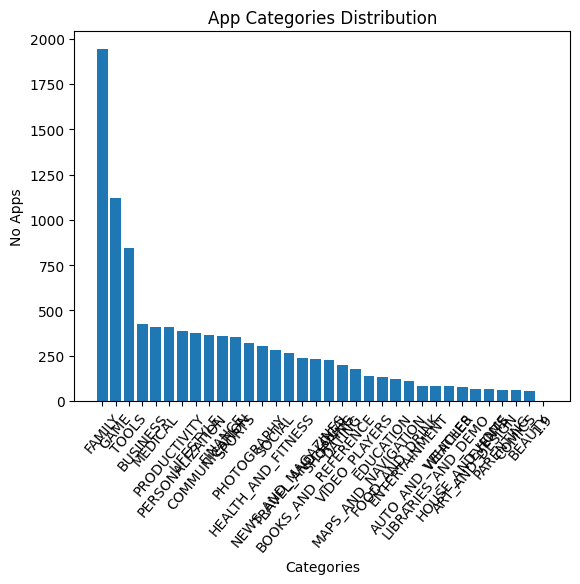

In [ ]:
# A)App Categories distribution
plt.subplot(1, 1, 1)
category_counts = df_cleaned['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=50)
plt.xlabel('Categories')
plt.ylabel('No Apps')
plt.title('App Categories Distribution')


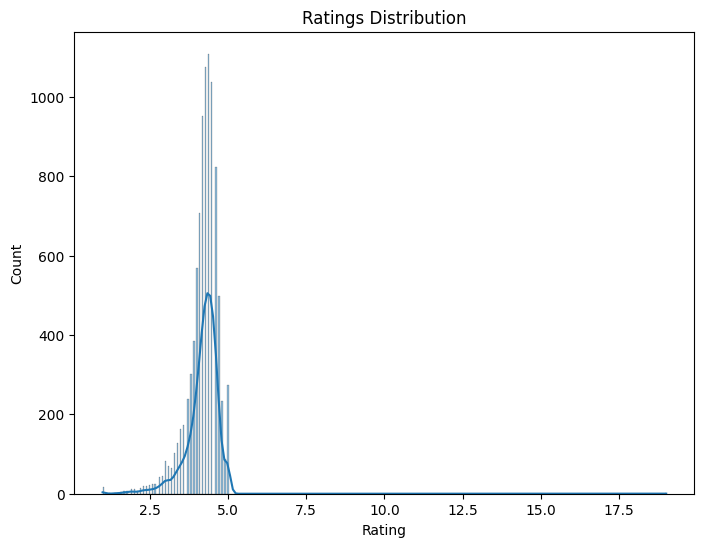

In [ ]:
#b) Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'].dropna(), kde=True)
plt.title('Ratings Distribution')
plt.show()

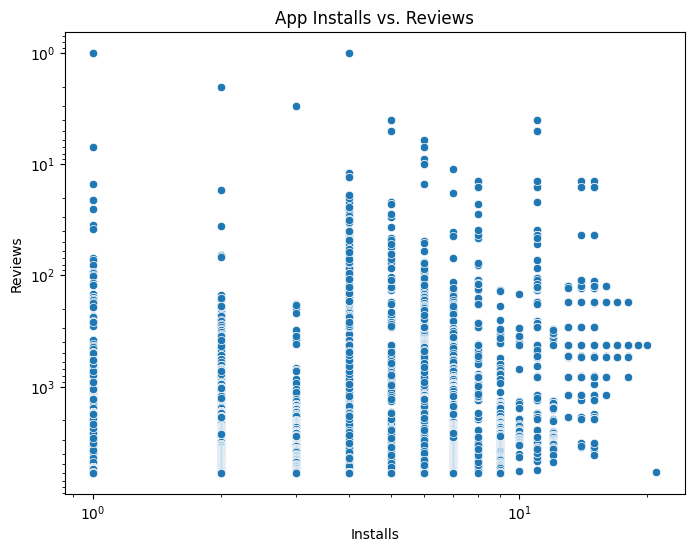

In [ ]:
#c) App Installs vs. Reviews:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Installs', y='Reviews', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('App Installs vs. Reviews')
plt.show()

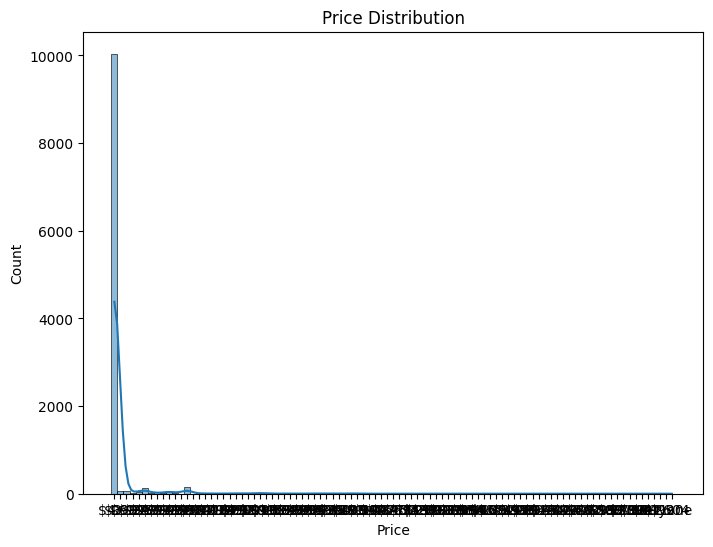

In [ ]:
#D)Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()


Explanation of Visualizations:

App Categories Distribution (Bar Chart): This chart shows the number of apps in each category. It helps us understand which categories have more representation in the dataset.

Ratings and Reviews Distribution (Scatter Plot): This scatter plot shows the relationship between ratings and the number of reviews for each app. It helps us see if there's any correlation between high ratings and a higher number of reviews.


Trends in Installs and User Interaction (Histogram): This histogram displays the distribution of the number of installs and user interaction scores. It allows us to observe the trends in these two metrics.


Top App Analysis:
a) Top-rated apps:

In [ ]:
top_rated_apps = df.sort_values(by='Rating', ascending=False).head(10)
print(top_rated_apps[['App', 'Category', 'Rating']])

                                           App  Category  Rating
10472  Life Made WI-Fi Touchscreen Photo Frame       1.9    19.0
9511                  Ek Bander Ne Kholi Dukan    FAMILY     5.0
10166                     FA Player Essentials    SPORTS     5.0
7895                Dine In CT - Food Delivery  SHOPPING     5.0
5118                          Eternal Light AG    SOCIAL     5.0
6953            BxPort - Bitcoin Bx (Thailand)   FINANCE     5.0
5125                     Ag Valley Cooperative  BUSINESS     5.0
7896                               CT Checkout   FINANCE     5.0
5139                              Chenoweth AH   MEDICAL     5.0
5145                          Arrowhead AH App   MEDICAL     5.0


#MOST INSTALLED APP

In [ ]:
most_installed_apps = df.sort_values(by='Installs', ascending=False).head(10)
print(most_installed_apps[['App', 'Category', 'Installs']])


                                               App            Category  \
10472      Life Made WI-Fi Touchscreen Photo Frame                 1.9   
420    UC Browser - Fast Download Private & Secure       COMMUNICATION   
474                    LINE: Free Calls & Messages       COMMUNICATION   
3767                  Flipboard: News For Our Time  NEWS_AND_MAGAZINES   
3574                                   Cloud Print        PRODUCTIVITY   
3326                  Gboard - the Google Keyboard               TOOLS   
431                                Viber Messenger       COMMUNICATION   
4222                 imo free video calls and chat       COMMUNICATION   
3235                              Google Translate               TOOLS   
1842                              Candy Crush Saga                GAME   

           Installs  
10472          Free  
420    500,000,000+  
474    500,000,000+  
3767   500,000,000+  
3574   500,000,000+  
3326   500,000,000+  
431    500,000,000+  
4222   50

1.Sentiment Analysis of Reviews (using TextBlob

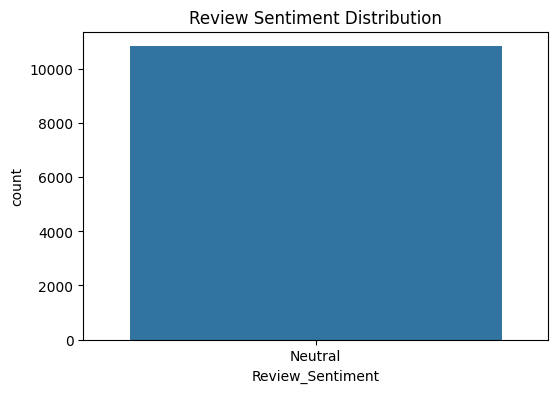

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Review_Sentiment'] = df['Reviews'].apply(get_sentiment)

# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Review_Sentiment', data=df)
plt.title('Review Sentiment Distribution')
plt.show()


#Development and representation of the results:

In [ ]:
selected_features = ['Category', 'Reviews']
X = df[selected_features].values
y = df['Installs'].values

KeyError: ignored

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Model training
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: ignored